# PySpark SQL & DataFrames

In this track, we will see about Spark SQL which is a Spark module for structured data processing. It provides a programming abstraction called DataFrames and can also act as a distributed SQL query engine. This chapter shows how Spark SQL allows you to use DataFrames in Python.

## Preparing the environment

### Importing libraries

In [1]:
import numpy as np
np.bool = np.bool_
# To avoid the error "AttributeError: module 'numpy' has no attribute 'bool'."

In [2]:
import matplotlib.pyplot as plt

from pyspark.sql.types import (_parse_datatype_string, StructType, StructField,
                               DoubleType, IntegerType, StringType)
from pyspark.sql import SparkSession
from pyspark_dist_explore import hist
from handyspark import *

In [3]:
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings coming from Arrow optimizations.

### Connect to Spark

In [4]:
spark = SparkSession.builder.getOrCreate()

# eval DataFrame in notebooks
spark.conf.set('spark.sql.repl.eagerEval.enabled', True)

In [5]:
sc = spark.sparkContext

### Reading the data

In [6]:
fifa = spark.read.csv('data-sources/Fifa2018_dataset.csv', header=True, inferSchema=True)
# cast to integer
for col_name in ['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure', 
                 'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving', 
                 'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy', 
                 'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties', 
                 'Positioning', 'Reactions', 'Short passing', 'Shot power', 'Sliding tackle', 
                 'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys']:
    fifa = fifa.withColumn(col_name, fifa[col_name].cast('integer'))
fifa.createOrReplaceTempView("fifa")
fifa.printSchema()
fifa.limit(2)

root
 |-- _c0: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Photo: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Flag: string (nullable = true)
 |-- Overall: integer (nullable = true)
 |-- Potential: integer (nullable = true)
 |-- Club: string (nullable = true)
 |-- Club Logo: string (nullable = true)
 |-- Value: string (nullable = true)
 |-- Wage: string (nullable = true)
 |-- Special: integer (nullable = true)
 |-- Acceleration: integer (nullable = true)
 |-- Aggression: integer (nullable = true)
 |-- Agility: integer (nullable = true)
 |-- Balance: integer (nullable = true)
 |-- Ball control: integer (nullable = true)
 |-- Composure: integer (nullable = true)
 |-- Crossing: integer (nullable = true)
 |-- Curve: integer (nullable = true)
 |-- Dribbling: integer (nullable = true)
 |-- Finishing: integer (nullable = true)
 |-- Free kick accuracy: integer (nullable = true)
 |-- GK diving: integer (nulla

_c0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofif...,Portugal,https://cdn.sofif...,94,94,Real Madrid CF,https://cdn.sofif...,€95.5M,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofif...,Argentina,https://cdn.sofif...,93,93,FC Barcelona,https://cdn.sofif...,€105M,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0


In [7]:
movies = spark.read.csv('data-sources/movie-ratings.csv', header=False, inferSchema=True,
                        schema='userId int, movieId int, rating double, timestamp int')
movies.createOrReplaceTempView("movies")
movies.printSchema()
movies.limit(2)

root
 |-- userId: integer (nullable = true)
 |-- movieId: integer (nullable = true)
 |-- rating: double (nullable = true)
 |-- timestamp: integer (nullable = true)



userId,movieId,rating,timestamp
1,31,2.5,1260759144
1,1029,3.0,1260759179


In [8]:
people = spark.read.csv('data-sources/people.csv', header=True, inferSchema=True)
people.createOrReplaceTempView("people")
people.printSchema()
people.limit(2)

root
 |-- _c0: integer (nullable = true)
 |-- person_id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- date of birth: timestamp (nullable = true)



_c0,person_id,name,sex,date of birth
0,100,Penelope Lewis,female,1990-08-31 00:00:00
1,101,David Anthony,male,1971-10-14 00:00:00


In [9]:
wine = spark.read.csv('data-sources/wine-data.csv', header=True, inferSchema=True)
wine.createOrReplaceTempView("wine")
wine.printSchema()
wine.limit(2)

root
 |-- Wine: integer (nullable = true)
 |-- Alcohol: double (nullable = true)
 |-- Malic.acid: double (nullable = true)
 |-- Ash: double (nullable = true)
 |-- Acl: double (nullable = true)
 |-- Mg: integer (nullable = true)
 |-- Phenols: double (nullable = true)
 |-- Flavanoids: double (nullable = true)
 |-- Nonflavanoid.phenols: double (nullable = true)
 |-- Proanth: double (nullable = true)
 |-- Color.int: double (nullable = true)
 |-- Hue: double (nullable = true)
 |-- OD: double (nullable = true)
 |-- Proline: integer (nullable = true)



Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050


In [10]:
spark.catalog.listTables()

[Table(name='fifa', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='movies', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='people', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='wine', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True)]

## Abstracting Data with DataFrames

### Create a DataFrame from RDD

In [11]:
iphones_RDD = sc.parallelize([
    ("XS", 2018, 5.65, 2.79, 6.24),
    ("XR", 2018, 5.94, 2.98, 6.84),
    ("X10", 2017, 5.65, 2.79, 6.13),
    ("8Plus", 2017, 6.23, 3.07, 7.12)
])
names = ['Model', 'Year', 'Height', 'Width', 'Weight']

In [12]:
iphones_df = spark.createDataFrame(iphones_RDD, schema=names)
type(iphones_df)

pyspark.sql.dataframe.DataFrame

In [13]:
iphones_df

Model,Year,Height,Width,Weight
XS,2018,5.65,2.79,6.24
XR,2018,5.94,2.98,6.84
X10,2017,5.65,2.79,6.13
8Plus,2017,6.23,3.07,7.12


In [14]:
iphones_df.printSchema()

root
 |-- Model: string (nullable = true)
 |-- Year: long (nullable = true)
 |-- Height: double (nullable = true)
 |-- Width: double (nullable = true)
 |-- Weight: double (nullable = true)



## Ex. 1 - RDD to DataFrame

Similar to RDDs, DataFrames are immutable and distributed data structures in Spark. Even though RDDs are a fundamental data structure in Spark, working with data in DataFrames is easier than in RDDs. So, understanding of how to convert an RDD to a DataFrame is necessary.

In this exercise, you'll first make an RDD using the `sample_list` that is already provided to you. This RDD contains a list of tuples `('Mona',20), ('Jennifer',34),('John',20), ('Jim',26)` with each tuple containing the name of the person and their age. Next, you'll create a DataFrame using the RDD and schema (which is the list of 'Name' and 'Age') and finally confirm the output is a PySpark DataFrame.

**Instructions:**

1. Create an RDD from the `sample_list`.
2. Create a PySpark DataFrame using the above RDD and schema.
3. Confirm the output as PySpark DataFrame.

In [15]:
# Create an RDD from the list
sample_list = [('Mona', 20), ('Jennifer', 34), ('John', 20), ('Jim', 26)]
rdd = sc.parallelize(sample_list)

# Create a PySpark DataFrame
names_df = spark.createDataFrame(rdd, schema=['Name', 'Age'])

# Check the type of names_df
print("The type of names_df is", type(names_df))

The type of names_df is <class 'pyspark.sql.dataframe.DataFrame'>


In [16]:
names_df

Name,Age
Mona,20
Jennifer,34
John,20
Jim,26


In [17]:
names_df.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Age: long (nullable = true)



## Ex. 2 - Loading CSV into DataFrame

In the previous exercise, you have seen a method for creating a DataFrame from an RDD. Generally, loading data from CSV file is the most common method of creating DataFrames. In this exercise, you'll create a PySpark DataFrame from the `people.csv` file that is already provided to you as a `file_path` and confirm the created object is a PySpark DataFrame.

**Instructions:**

1. Create a DataFrame from `file_path` variable which is the path to the `people.csv` file.
2. Confirm the output as PySpark DataFrame.

In [18]:
# Create an DataFrame from file_path
file_path = 'data-sources/people.csv'
people_df = spark.read.csv(file_path, header=True, inferSchema=True)

# Check the type of people_df
print("The type of people_df is", type(people_df))

The type of people_df is <class 'pyspark.sql.dataframe.DataFrame'>


## Operating on DataFrames in PySpark

### select() and show() operations

- `select()` transformation subsets the columns in the DataFrame
- `show()` action prints first 20 rows in the DataFrame

In [19]:
df_id_age = fifa.select('ID', 'Name', 'Age')
df_id_age.show(3)

+------+-----------------+---+
|    ID|             Name|Age|
+------+-----------------+---+
| 20801|Cristiano Ronaldo| 32|
|158023|         L. Messi| 30|
|190871|           Neymar| 25|
+------+-----------------+---+
only showing top 3 rows



### filter() and show() operations

- `filter()` transformation filters out the rows based on a condition

In [20]:
df_age21 = fifa.select('ID', 'Name', 'Age').filter(fifa.Age > 21)
df_age21.show(3)

+------+-----------------+---+
|    ID|             Name|Age|
+------+-----------------+---+
| 20801|Cristiano Ronaldo| 32|
|158023|         L. Messi| 30|
|190871|           Neymar| 25|
+------+-----------------+---+
only showing top 3 rows



### groupby() and count() operations

- `groupby()` operation can be used to group a variable

In [21]:
test_df_age_group = fifa.groupby('Age')
test_df_age_group.count().show(3)

+---+-----+
|Age|count|
+---+-----+
| 31|  671|
| 34|  272|
| 28| 1051|
+---+-----+
only showing top 3 rows



### orderby() Transformations

- `orderby()` operation sorts the DataFrame based on one or more columns

In [22]:
test_df_age_group.count().orderBy('Age').show(3)

+---+-----+
|Age|count|
+---+-----+
| 16|   13|
| 17|  258|
| 18|  672|
+---+-----+
only showing top 3 rows



### dropDuplicates()
- `
dropDuplicates(`) removes the duplicate rows of a DataFrame

In [23]:
test_df = fifa.select('Nationality', 'Age')
test_df.count()

17981

In [24]:
test_df_no_dup = test_df.dropDuplicates()
test_df_no_dup.count()

1721

### withColumnRenamed Transformations

- `withColumnRenamed()` renames a column in the DataFrame

In [25]:
test_df_sex = people.select('person_id', 'name', 'sex').withColumnRenamed('Sex', 'Gender')
test_df_sex.show(3)

+---------+--------------+------+
|person_id|          name|Gender|
+---------+--------------+------+
|      100|Penelope Lewis|female|
|      101| David Anthony|  male|
|      102|     Ida Shipp|female|
+---------+--------------+------+
only showing top 3 rows



### printSchema()

- `printSchema()` operation prints the types of columns in the DataFrame

In [26]:
people.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- person_id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- date of birth: timestamp (nullable = true)



### columns actions

- `columns` operator prints the columns of a DataFrame

In [27]:
people.columns

['_c0', 'person_id', 'name', 'sex', 'date of birth']

### describe() actions

- `describe()` operation compute summary statistics of numerical columns in the DataFrame

In [28]:
people.describe().show()

+-------+-----------------+-----------------+-------------+------+
|summary|              _c0|        person_id|         name|   sex|
+-------+-----------------+-----------------+-------------+------+
|  count|           100000|           100000|       100000| 98080|
|   mean|          49999.5|          50099.5|         NULL|  NULL|
| stddev|28867.65779668774|28867.65779668774|         NULL|  NULL|
|    min|                0|              100|Aaron Addesso|female|
|    max|            99999|           100099|  Zulma Biggs|  male|
+-------+-----------------+-----------------+-------------+------+



## Ex. 3 - Inspecting data in PySpark DataFrame

Inspecting data is very crucial before performing analysis such as plotting, modeling, training etc. In this simple exercise, you'll inspect the data in the `people` DataFrame that you have created using basic DataFrame operators.

**Instructions:**

- Print the first 10 observations in the `people_df` DataFrame.
- Count the number of rows in the `people_df` DataFrame.
- How many columns does `people_df` DataFrame have and what are their names?

In [29]:
# Print the first 10 observations 
people.show(10)

# Count the number of rows 
print("There are {} rows in the people DataFrame.".format(people.count()))

# Count the number of columns and print their names
print(f'''
There are {len(people.columns)} columns in the people DataFrame 
and their names are {people.columns}
''')

+---+---------+----------------+------+-------------------+
|_c0|person_id|            name|   sex|      date of birth|
+---+---------+----------------+------+-------------------+
|  0|      100|  Penelope Lewis|female|1990-08-31 00:00:00|
|  1|      101|   David Anthony|  male|1971-10-14 00:00:00|
|  2|      102|       Ida Shipp|female|1962-05-24 00:00:00|
|  3|      103|    Joanna Moore|female|2017-03-10 00:00:00|
|  4|      104|  Lisandra Ortiz|female|2020-08-05 00:00:00|
|  5|      105|   David Simmons|  male|1999-12-30 00:00:00|
|  6|      106|   Edward Hudson|  male|1983-05-09 00:00:00|
|  7|      107|    Albert Jones|  male|1990-09-13 00:00:00|
|  8|      108|Leonard Cavender|  male|1958-08-08 00:00:00|
|  9|      109|  Everett Vadala|  male|2005-05-24 00:00:00|
+---+---------+----------------+------+-------------------+
only showing top 10 rows

There are 100000 rows in the people DataFrame.

There are 5 columns in the people DataFrame 
and their names are ['_c0', 'person_id', 

## Ex. 4 - PySpark DataFrame subsetting and cleaning

After the data inspection, it is often necessary to clean the data which mainly involves subsetting, renaming the columns, removing duplicated rows etc., PySpark DataFrame API provides several operators to do this. In this exercise, your job is to subset 'name', 'sex' and 'date of birth' columns from people_df DataFrame, remove any duplicate rows from that dataset and count the number of rows before and after duplicates removal step.

**Instructions:**

1. Select 'name', 'sex', and 'date of birth' columns from `people` and create `people_sub` DataFrame.
2. Print the first 10 observations in the `people_sub` DataFrame.
3. Remove duplicate entries from `people_sub` DataFrame and create `people_sub_nodup` DataFrame.
4. How many rows are there before and after duplicates are removed?

In [30]:
# Select name, sex and date of birth columns
people_sub = people.select('name', 'sex', 'date of birth')

# Print the first 10 observations from people_sub
people_sub.show(10)

# Remove duplicate entries from people_sub
people_sub_nodup = people_sub.dropDuplicates()

# Count the number of rows
print(f'''
There were {people_sub.count()} rows before removing duplicates, 
and {people_sub_nodup.count()} rows after removing duplicates
''')

+----------------+------+-------------------+
|            name|   sex|      date of birth|
+----------------+------+-------------------+
|  Penelope Lewis|female|1990-08-31 00:00:00|
|   David Anthony|  male|1971-10-14 00:00:00|
|       Ida Shipp|female|1962-05-24 00:00:00|
|    Joanna Moore|female|2017-03-10 00:00:00|
|  Lisandra Ortiz|female|2020-08-05 00:00:00|
|   David Simmons|  male|1999-12-30 00:00:00|
|   Edward Hudson|  male|1983-05-09 00:00:00|
|    Albert Jones|  male|1990-09-13 00:00:00|
|Leonard Cavender|  male|1958-08-08 00:00:00|
|  Everett Vadala|  male|2005-05-24 00:00:00|
+----------------+------+-------------------+
only showing top 10 rows


There were 100000 rows before removing duplicates, 
and 99998 rows after removing duplicates



## Ex. 5 - Filtering your DataFrame

In the previous exercise, you have subset the data using `select()` operator which is mainly used to subset the DataFrame column-wise. What if you want to subset the DataFrame based on a condition (for example, select all rows where the sex is Female). In this exercise, you will filter the rows in the `people` DataFrame in which 'sex' is female and male and create two different datasets. Finally, you'll count the number of rows in each of those datasets.

**Instructions:**

1. Filter the `people` DataFrame to select all rows where sex is female into `people_female` DataFrame.
2. Filter the `people` DataFrame to select all rows where sex is male into `people_male` DataFrame.
3. Count the number of rows in `people_female` and `people_male` DataFrames.

In [31]:
# Filter people to select females 
people_female = people.filter(people.sex == "female")

# Filter people to select males
people_male = people.filter(people.sex == "male")

# Count the number of rows 
print(f'''
There are {people_female.count()} rows in the people_female DataFrame 
and {people_male.count()} rows in the people_male DataFrame
''')


There are 49014 rows in the people_female DataFrame 
and 49066 rows in the people_male DataFrame



## Interacting with DataFrames using PySpark SQL

### Executing SQL Queries

In [32]:
test_data = sc.parallelize([(1, 'row1'), (2, 'row2'), (3, 'row3')])
col_names = ['field1', 'field2']

test_df = spark.createDataFrame(test_data, schema=col_names)
type(test_df)

pyspark.sql.dataframe.DataFrame

In [33]:
test_df.createOrReplaceTempView("test_table")
test_df2 = spark.sql("SELECT field1, field2 FROM test_table")
test_df2.collect()

[Row(field1=1, field2='row1'),
 Row(field1=2, field2='row2'),
 Row(field1=3, field2='row3')]

### SQL query to extract data

In [34]:
people.createOrReplaceTempView("people")
query = '''SELECT person_id FROM people'''
people_df = spark.sql(query)
people_df.show(5)

+---------+
|person_id|
+---------+
|      100|
|      101|
|      102|
|      103|
|      104|
+---------+
only showing top 5 rows



### Summarizing and grouping data using SQL queries

In [35]:
fifa.createOrReplaceTempView("fifa")
query = '''SELECT Nationality, max(Age) FROM fifa GROUP BY Nationality'''
spark.sql(query).show(5)

+-----------+--------+
|Nationality|max(Age)|
+-----------+--------+
|       Chad|      26|
|     Russia|      37|
|   Paraguay|      37|
|    Senegal|      34|
|     Sweden|      37|
+-----------+--------+
only showing top 5 rows



### Filtering columns using SQL queries

In [36]:
fifa.createOrReplaceTempView("fifa")
query = "SELECT Age, Nationality, Potential FROM fifa WHERE Potential > 85 AND Nationality == 'Spain'"
spark.sql(query).show(5)

+---+-----------+---------+
|Age|Nationality|Potential|
+---+-----------+---------+
| 26|      Spain|       92|
| 31|      Spain|       90|
| 26|      Spain|       90|
| 31|      Spain|       87|
| 30|      Spain|       87|
+---+-----------+---------+
only showing top 5 rows



## Ex. 6 - Running SQL Queries Programmatically

DataFrames can be easily manipulated using SQL queries in PySpark. The `sql()` function in a SparkSession enables applications to run SQL queries programmatically and returns the result as another DataFrame. In this exercise, you'll create a temporary table of DataFrame that you have created previously, then construct a query to select the names of the people from the temporary table and assign the result to a new DataFrame.

**Instructions:**

1. Create a temporary table `people`.
2. Construct a query to select the names of the people from the temporary table `people`.
3. Assign the result of Spark's query to a new DataFrame - `people_names`.
4. Print the top 10 names of the people from `people_names` DataFrame.

In [37]:
# Create a temporary table "people"
people.createOrReplaceTempView("people")

# Construct a query to select the names of the people from the temporary table "people"
query = '''SELECT name FROM people'''

# Assign the result of Spark's query to people_names
people_names = spark.sql(query)

# Print the top 10 names of the people
people_names.show(10)

+----------------+
|            name|
+----------------+
|  Penelope Lewis|
|   David Anthony|
|       Ida Shipp|
|    Joanna Moore|
|  Lisandra Ortiz|
|   David Simmons|
|   Edward Hudson|
|    Albert Jones|
|Leonard Cavender|
|  Everett Vadala|
+----------------+
only showing top 10 rows



## Ex. 7 - SQL queries for filtering Table

In the previous exercise, you have run a simple SQL query on a DataFrame. There are more sophisticated queries you can construct to obtain the result that you want and use it for downstream analysis such as data visualization and Machine Learning. In this exercise, we will use the temporary table people that you have created previously, filter out the rows where the "sex" is male and female and create two DataFrames.

**Instructions:**

1. Filter the `people` table to select all rows where sex is female into `people_female` DataFrame.
2. Filter the `people` table to select all rows where sex is male into `people_male` DataFrame.
3. Count the number of rows in both `people_female` and `people_male` DataFrames.

In [38]:
# Filter the people table to select female sex 
people_female = spark.sql('SELECT * FROM people WHERE sex=="female"')

# Filter the people table DataFrame to select male sex
people_male = spark.sql('SELECT * FROM people WHERE sex=="male"')

# Count the number of rows in both people_female and people_male DataFrames
print(f'''
There are {people_female.count()} rows in the people_female 
and {people_male.count()} rows in the people_male DataFrames.
''')


There are 49014 rows in the people_female 
and 49066 rows in the people_male DataFrames.



## Data Visualization in PySpark using DataFrames

### Data Visualization using Pyspark_dist_explore

- `Pyspark_dist_explore` library provides quick insights into DataFrames
- Currently three functions available : `hist()` , `distplot()` , and `pandas_histogram()`

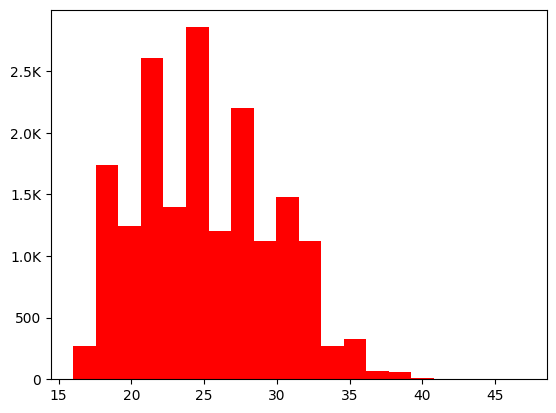

In [39]:
fifa_age = fifa.select('Age')

fig, ax = plt.subplots()
_ = hist(ax, fifa_age, bins = 20, color="red")

### Using Pandas for plotting DataFrames

- It's easy to create charts from pandas DataFrames
- Note: When you have large volumes of data, using toPandas() isn't recommended

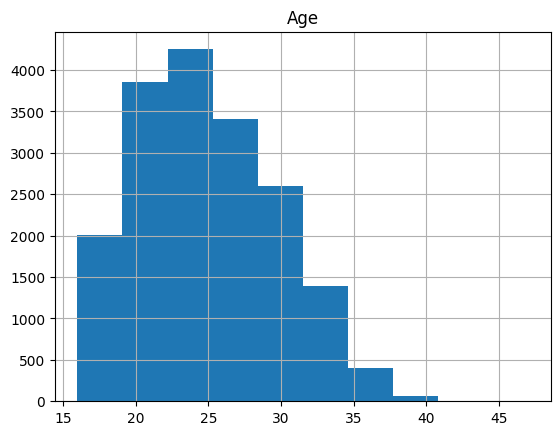

In [40]:
fifa_pandas = fifa.toPandas()
_ = fifa_pandas.hist('Age')

### HandySpark method of visualization

- HandySpark is a package designed to improve PySpark user experience
    - Easy data fetching
    - Distributed computation retained

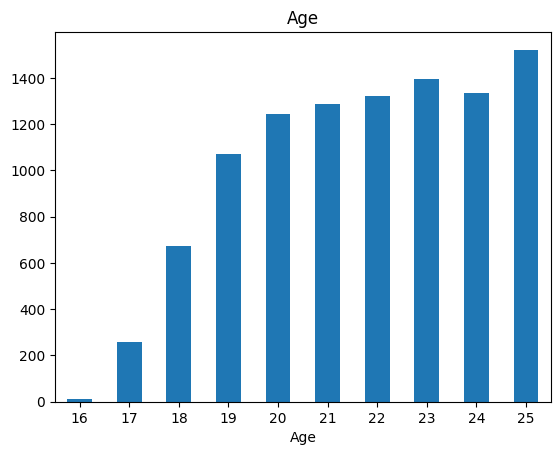

In [41]:
hdf = fifa.toHandy()
_ = hdf.cols["Age"].hist()

## Ex. 8 - PySpark DataFrame visualization
Graphical representations or visualization of data is imperative for understanding as well as interpreting the data. In this simple data visualization exercise, you'll first print the column names of `names_df` DataFrame that you have created earlier, then convert the `names_df` to Pandas DataFrame, and finally plot the contents as horizontal bar plot with names of the people on the x-axis and their age on the y-axis.

**Instructions:**

1. Print the names of the columns in `names_df` DataFrame.
2. Convert `names_df` DataFrame to `df_pandas` Pandas DataFrame.
3. Use matplotlib's `plot()` method to create a horizontal bar plot with `'Name'` on x-axis and `'Age'` on y-axis.

In [42]:
names_df = fifa.select('Name', 'Age').limit(5)
names_df

Name,Age
Cristiano Ronaldo,32
L. Messi,30
Neymar,25
L. Suárez,30
M. Neuer,31


The column names of names_df are ['Name', 'Age']


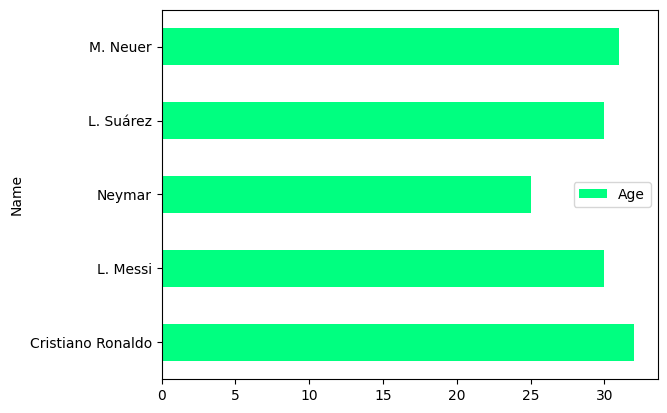

In [43]:
# Check the column names of names_df
print("The column names of names_df are", names_df.columns)

# Convert to Pandas DataFrame  
df_pandas = names_df.toPandas()

# Create a horizontal bar plot
df_pandas.plot(kind='barh', x='Name', y='Age', colormap='winter_r')
plt.show()

## Ex. 9 - Part 1: Create a DataFrame from CSV file

Every 4 years, soccer fans throughout the world celebrate a festival called “Fifa World Cup” and with that, everything seems to change in many countries. In this 3 part exercise, you'll be doing some exploratory data analysis (EDA) on the "FIFA 2018 World Cup Player" dataset using PySpark SQL which involves DataFrame operations, SQL queries, and visualization.

In the first part, you'll load FIFA 2018 World Cup Players dataset (Fifa2018_dataset.csv), which is in CSV format, into a PySpark's dataFrame and inspect the data using basic DataFrame operations.

**Instructions:**

1. Create a `PySpark` DataFrame from `file_path` (which is the path to the `Fifa2018_dataset.csv` file).
2. Print the schema of the DataFrame.
3. Print the first 10 observations.
4. How many rows are in there in the DataFrame?

In [44]:
# Load the Dataframe
file_path = 'data-sources/Fifa2018_dataset.csv'
fifa_df = spark.read.csv(file_path, header=True, inferSchema=True)

# Check the schema of columns
fifa_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Photo: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Flag: string (nullable = true)
 |-- Overall: integer (nullable = true)
 |-- Potential: integer (nullable = true)
 |-- Club: string (nullable = true)
 |-- Club Logo: string (nullable = true)
 |-- Value: string (nullable = true)
 |-- Wage: string (nullable = true)
 |-- Special: integer (nullable = true)
 |-- Acceleration: string (nullable = true)
 |-- Aggression: string (nullable = true)
 |-- Agility: string (nullable = true)
 |-- Balance: string (nullable = true)
 |-- Ball control: string (nullable = true)
 |-- Composure: string (nullable = true)
 |-- Crossing: string (nullable = true)
 |-- Curve: string (nullable = true)
 |-- Dribbling: string (nullable = true)
 |-- Finishing: string (nullable = true)
 |-- Free kick accuracy: string (nullable = true)
 |-- GK diving: string (nullable = true)


In [45]:
# Show the first 10 observations
# fifa_df.show(10)
fifa_df.limit(10)

_c0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofif...,Portugal,https://cdn.sofif...,94,94,Real Madrid CF,https://cdn.sofif...,€95.5M,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofif...,Argentina,https://cdn.sofif...,93,93,FC Barcelona,https://cdn.sofif...,€105M,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofif...,Brazil,https://cdn.sofif...,92,94,Paris Saint-Germain,https://cdn.sofif...,€123M,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofif...,Uruguay,https://cdn.sofif...,92,92,FC Barcelona,https://cdn.sofif...,€97M,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofif...,Germany,https://cdn.sofif...,92,92,FC Bayern Munich,https://cdn.sofif...,€61M,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NULL,NULL,NULL,NULL,NULL,167495,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,GK,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
5,R. Lewandowski,28,https://cdn.sofif...,Poland,https://cdn.sofif...,91,91,FC Bayern Munich,https://cdn.sofif...,€92M,€355K,2143,79,80,78,80,89,87,62,77,85,91,84,15,6,12,8,10,85,39,84,65,83,25,81,91,91,83,88,19,83,79,42,84,78,87,84.0,57.0,62.0,87.0,78.0,188545,84.0,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,ST,84.0,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
6,De Gea,26,https://cdn.sofif...,Spain,https://cdn.sofif...,90,92,Manchester United,https://cdn.sofif...,€64.5M,€215K,1458,57,38,60,43,42,64,17,21,18,13,19,90,85,87,86,90,21,30,67,51,12,13,40,12,88,50,31,13,58,40,21,64,68,13,NULL,NULL,NULL,NULL,NULL,193080,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,GK,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
7,E. Hazard,26,https://cdn.sofif...,Belgium,https://cdn.sofif...,90,91,Chelsea,https://cdn.sofif...,€90.5M,€295K,2096,93,54,93,91,92,87,80,82,93,83,79,11,12,6,8,8,57,41,59,81,82,25,86,85,85,86,79,22,87,79,27,65,86,79,88.0,47.0,61.0,87.0,81.0,183277,88.0,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,LW,88.0,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0
8,T. Kroos,27,https://cdn.sofif...,Germany,https://cdn.sofif...,90,90,Real Madrid CF,https://cdn.sofif...,€79M,€340K,2165,60,60,71,69,89,85,85,85,79,76,84,10,11,13,7,10,54,85,32,93,90,63,73,79,86,90,87,69,52,77,82,74,88,82,83.0,72.0,82.0,81.0,87.0,182521,83.0,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,CDM CM,83.0,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0
9,G. Higuaín,29,https://cdn.sofif...,Argentina,https://cdn.sofif...,90,90,Juventus,https://cdn.sofif...,€77M,€275K,1961,78,50,

In [46]:
# Print the total number of rows
print("There are {} rows in the fifa_df DataFrame".format(fifa_df.count()))

There are 17981 rows in the fifa_df DataFrame


## Ex. 10 - Part 2: SQL Queries on DataFrame

The `fifa_df` DataFrame that we created has additional information about datatypes and names of columns associated with it. This additional information allows PySpark SQL to run SQL queries on DataFrame. SQL queries are concise and easy to run compared to DataFrame operations. But in order to apply SQL queries on DataFrame first, you need to create a temporary view of DataFrame as a table and then apply SQL queries on the created table (Running SQL Queries Programmatically).

In the second part, you'll create a temporary table of `fifa_df` DataFrame and run SQL queries to extract the `'Age'` column of players from Germany.

**Instructions:**

1. Create temporary table `fifa_df_table` from `fifa_df` DataFrame.
2. Construct a "query" to extract the `"Age"` column from `Germany` players in `fifa_df_table`.
3. Apply the SQL "query" and create a new DataFrame `fifa_df_germany_age`.
4. Computes basic statistics of the created DataFrame.

In [47]:
# Create a temporary view of fifa_df
fifa_df.createOrReplaceTempView('fifa_df_table')

# Construct the "query"
query = '''SELECT Age FROM fifa_df_table WHERE Nationality == "Germany"'''

# Apply the SQL "query"
fifa_df_germany_age = spark.sql(query)

# Generate basic statistics
fifa_df_germany_age.describe().show()

+-------+-----------------+
|summary|              Age|
+-------+-----------------+
|  count|             1140|
|   mean|24.20263157894737|
| stddev|4.197096712293752|
|    min|               16|
|    max|               36|
+-------+-----------------+



## Ex. 11 - Part 3: Data visualization

Data visualization is important for exploratory data analysis (EDA). PySpark DataFrame is perfect for data visualization compared to RDDs because of its inherent structure and schema.

In this third part, you'll create a histogram of the ages of all the players from Germany from the DataFrame that you created in the previous exercise. For this, you'll first convert the PySpark DataFrame into Pandas DataFrame and use matplotlib's `plot()` function to create a density plot of ages of all players from Germany.

**Instructions:**

1. Convert `fifa_df_germany_age` to `fifa_df_germany_age_pandas` Pandas DataFrame.
2. Generate a density plot of the `'Age'` column from the `fifa_df_germany_age_pandas` Pandas DataFrame.

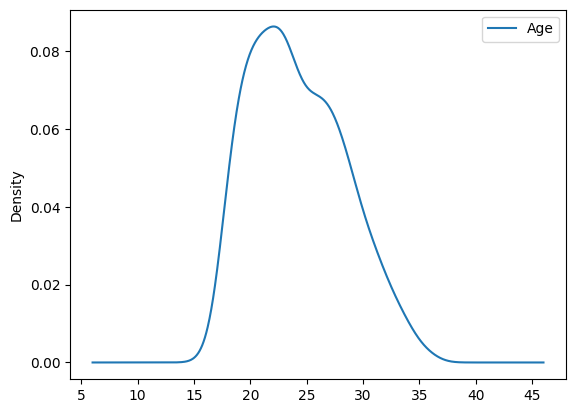

In [48]:
# Convert fifa_df to fifa_df_germany_age_pandas DataFrame
fifa_df_germany_age_pandas = fifa_df_germany_age.toPandas()

# Plot the 'Age' density of Germany Players
fifa_df_germany_age_pandas.plot(kind='density')
plt.show()

## Close

In [49]:
spark.stop()